<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2012/OneCycleLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git

In [8]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments')
!git pull origin master

From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch                master     -> FETCH_HEAD
Already up to date.


In [9]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')

In [10]:
import torch
import torchvision
import os
from torchvision import transforms
from DataLoader import *

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')
train_path = 'train'
test_path = 'test'
train_loader,test_loader = data_loader_(train_path,test_path,128)

In [11]:
import torch
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from resnet import ResNet18
net = ResNet18(num_classes = 200).to(device)
summary(net, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


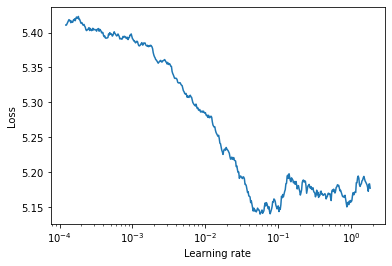

NameError: ignored

In [13]:
from LR_Finder import *
from Training_Testing import *
tt = TrainTest()
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

lr_finder = LRFinder(net, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=2, num_iter=500,step_mode="exp")
lr_finder.plot()

lr_ = pd.DataFrame(lr_finder.history)
lr_max = lr_.loc[lr_['loss']==lr_['loss'].min(),'lr'].values[0]
lr_max

In [ ]:
# lr_min =  LR_Min(train_loader,lr_max)

In [ ]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

net = ResNet18(num_classes = 200).to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.1, momentum = 0.85,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,
                                          max_lr = lr_max.values[0], 
                                          pct_start = 0.3, # 5/24
                                          epochs =50,
                                          steps_per_epoch=len(trainloader),
                                          div_factor = 10,
                                          final_div_factor = 1)

for epoch in range(50):
    print("EPOCH:", epoch)
    tt.train_(net, device, trainloader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, testloader)  
    scheduler.step()
       
print('Finished Training')